# Bayesian Logistic Regression - Model Convergence Analysis

This notebook analyzes the convergence of the Bayesian MCMC model trained on the Heart Failure dataset. We will inspect the trace of the weights to ensure the chain has mixed well and converged to the posterior distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Model Trace

In [2]:
try:
    trace = np.load('model/model_trace.npy')
    print(f"Trace shape: {trace.shape} (Iterations x Features)")
except FileNotFoundError:
    print("Error: 'model/model_trace.npy' not found. Please run 'aprendizaje.py' first.")

Trace shape: (50001, 12) (Iterations x Features)


## 2. Trace Plots
Visualizing the path of each weight parameter over the iterations. A "fuzzy caterpillar" look indicates good mixing.

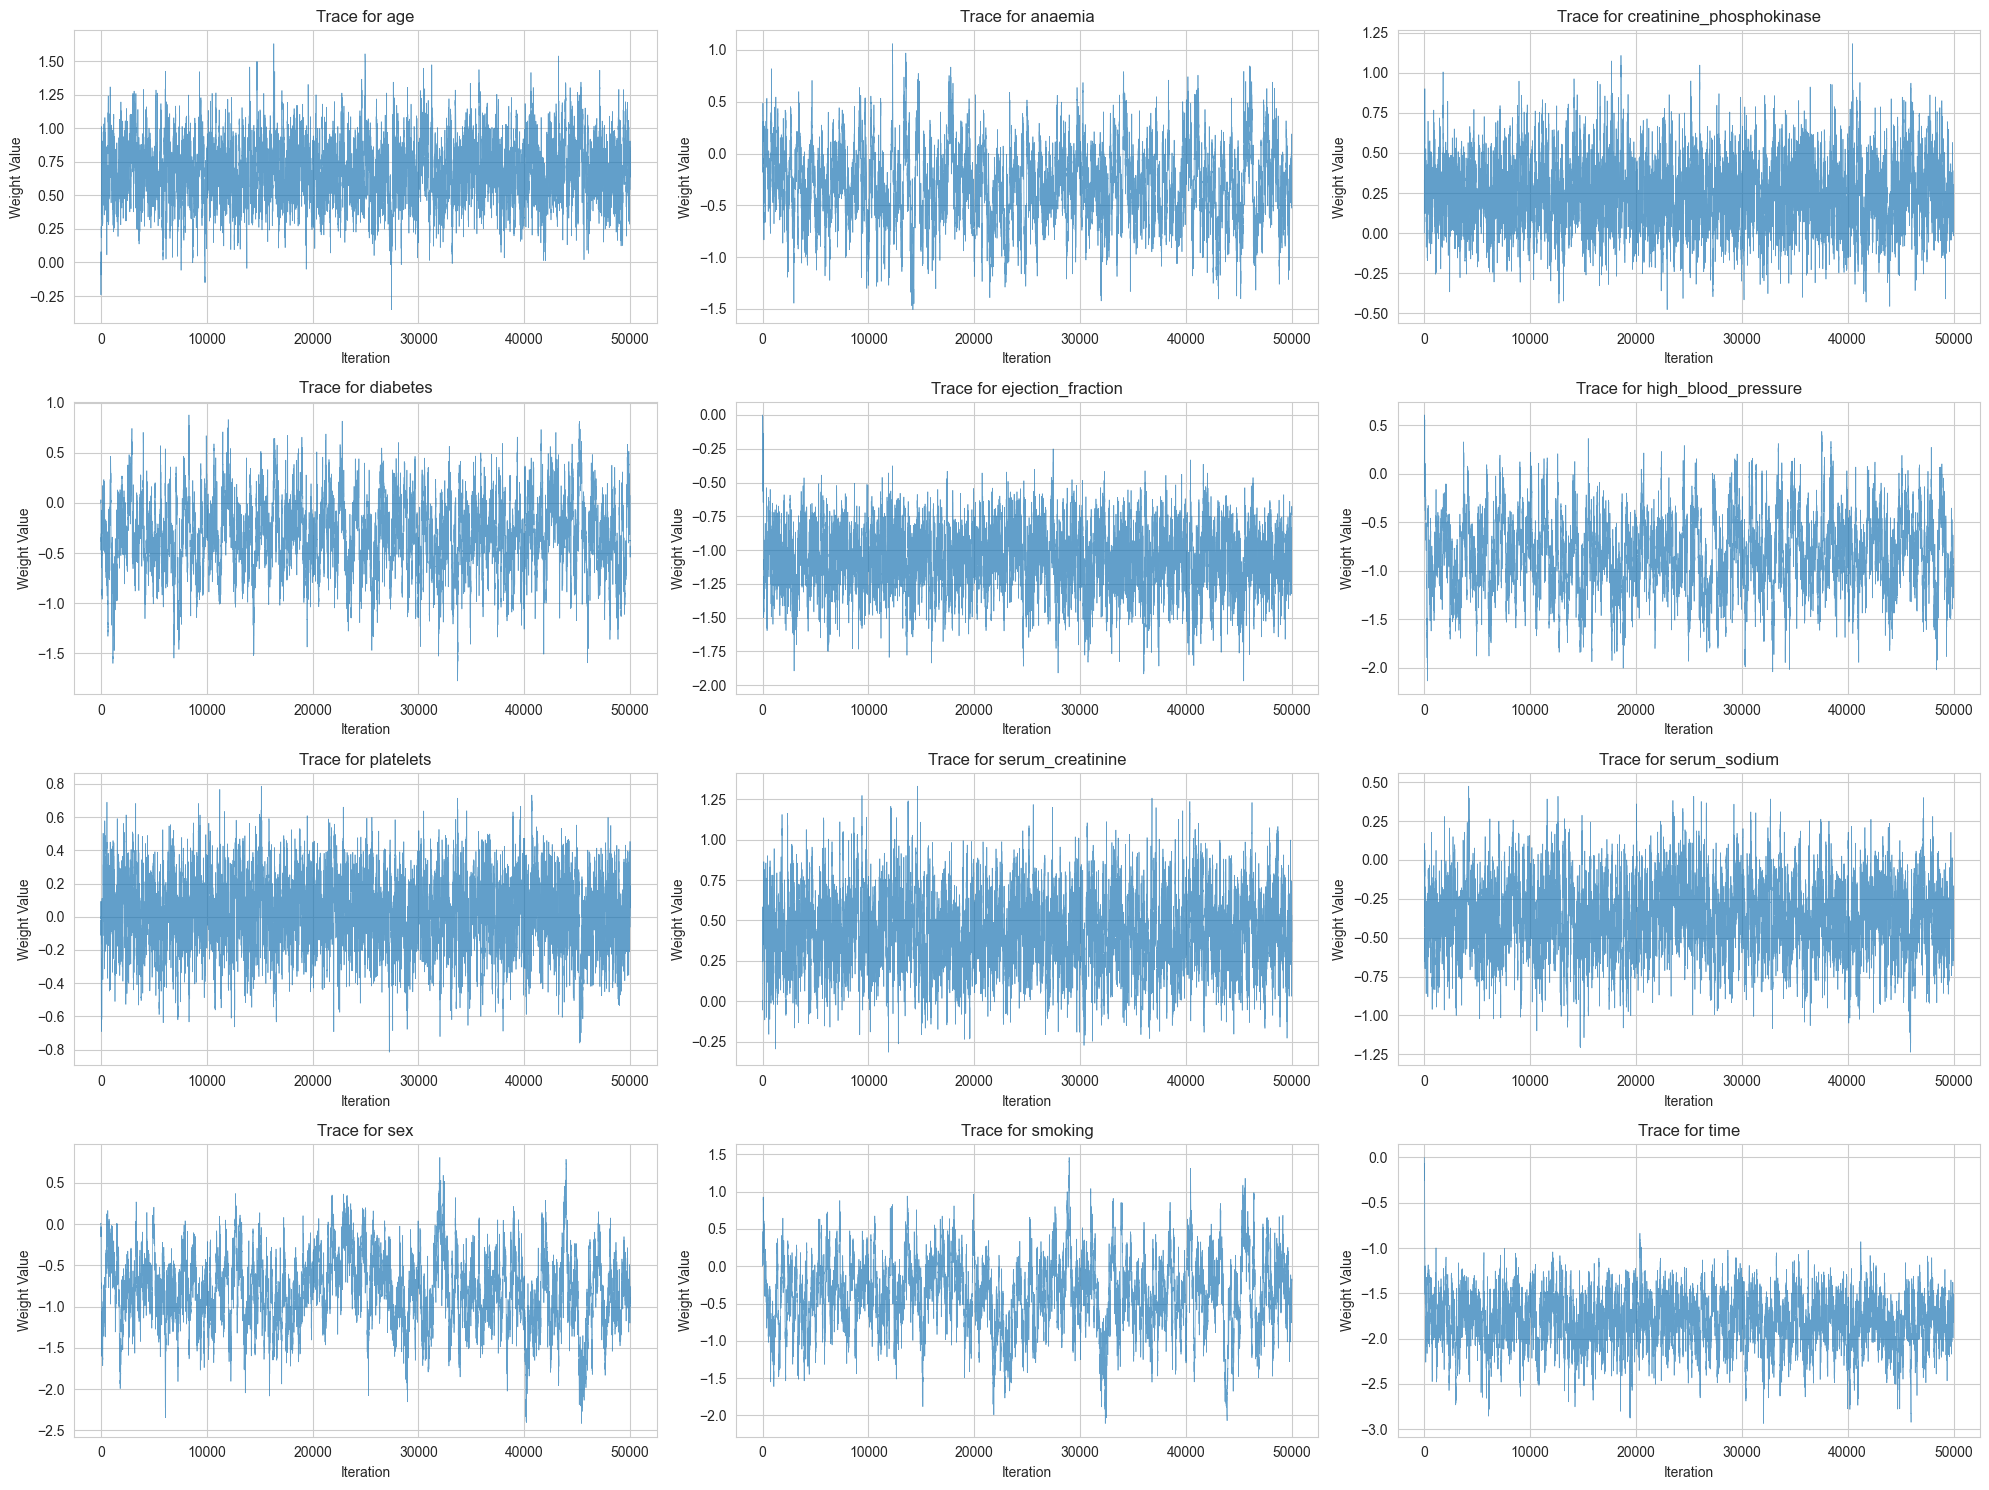

In [ ]:
feature_names = [
    'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
    'ejection_fraction', 'high_blood_pressure', 'platelets',
    'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'
]

# If the number of features in trace matches our list, use names, else use indices
if trace.shape[1] == len(feature_names):
    labels = feature_names
else:
    labels = [f'Weight {i}' for i in range(trace.shape[1])]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < trace.shape[1]:
        ax.plot(trace[:, i], lw=0.5, alpha=0.7)
        ax.set_title(f'Trace for {labels[i]}')
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Weight Value')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

## 3. Posterior Distributions
Histograms and Kernel Density Estimates (KDE) of the weights after burn-in.

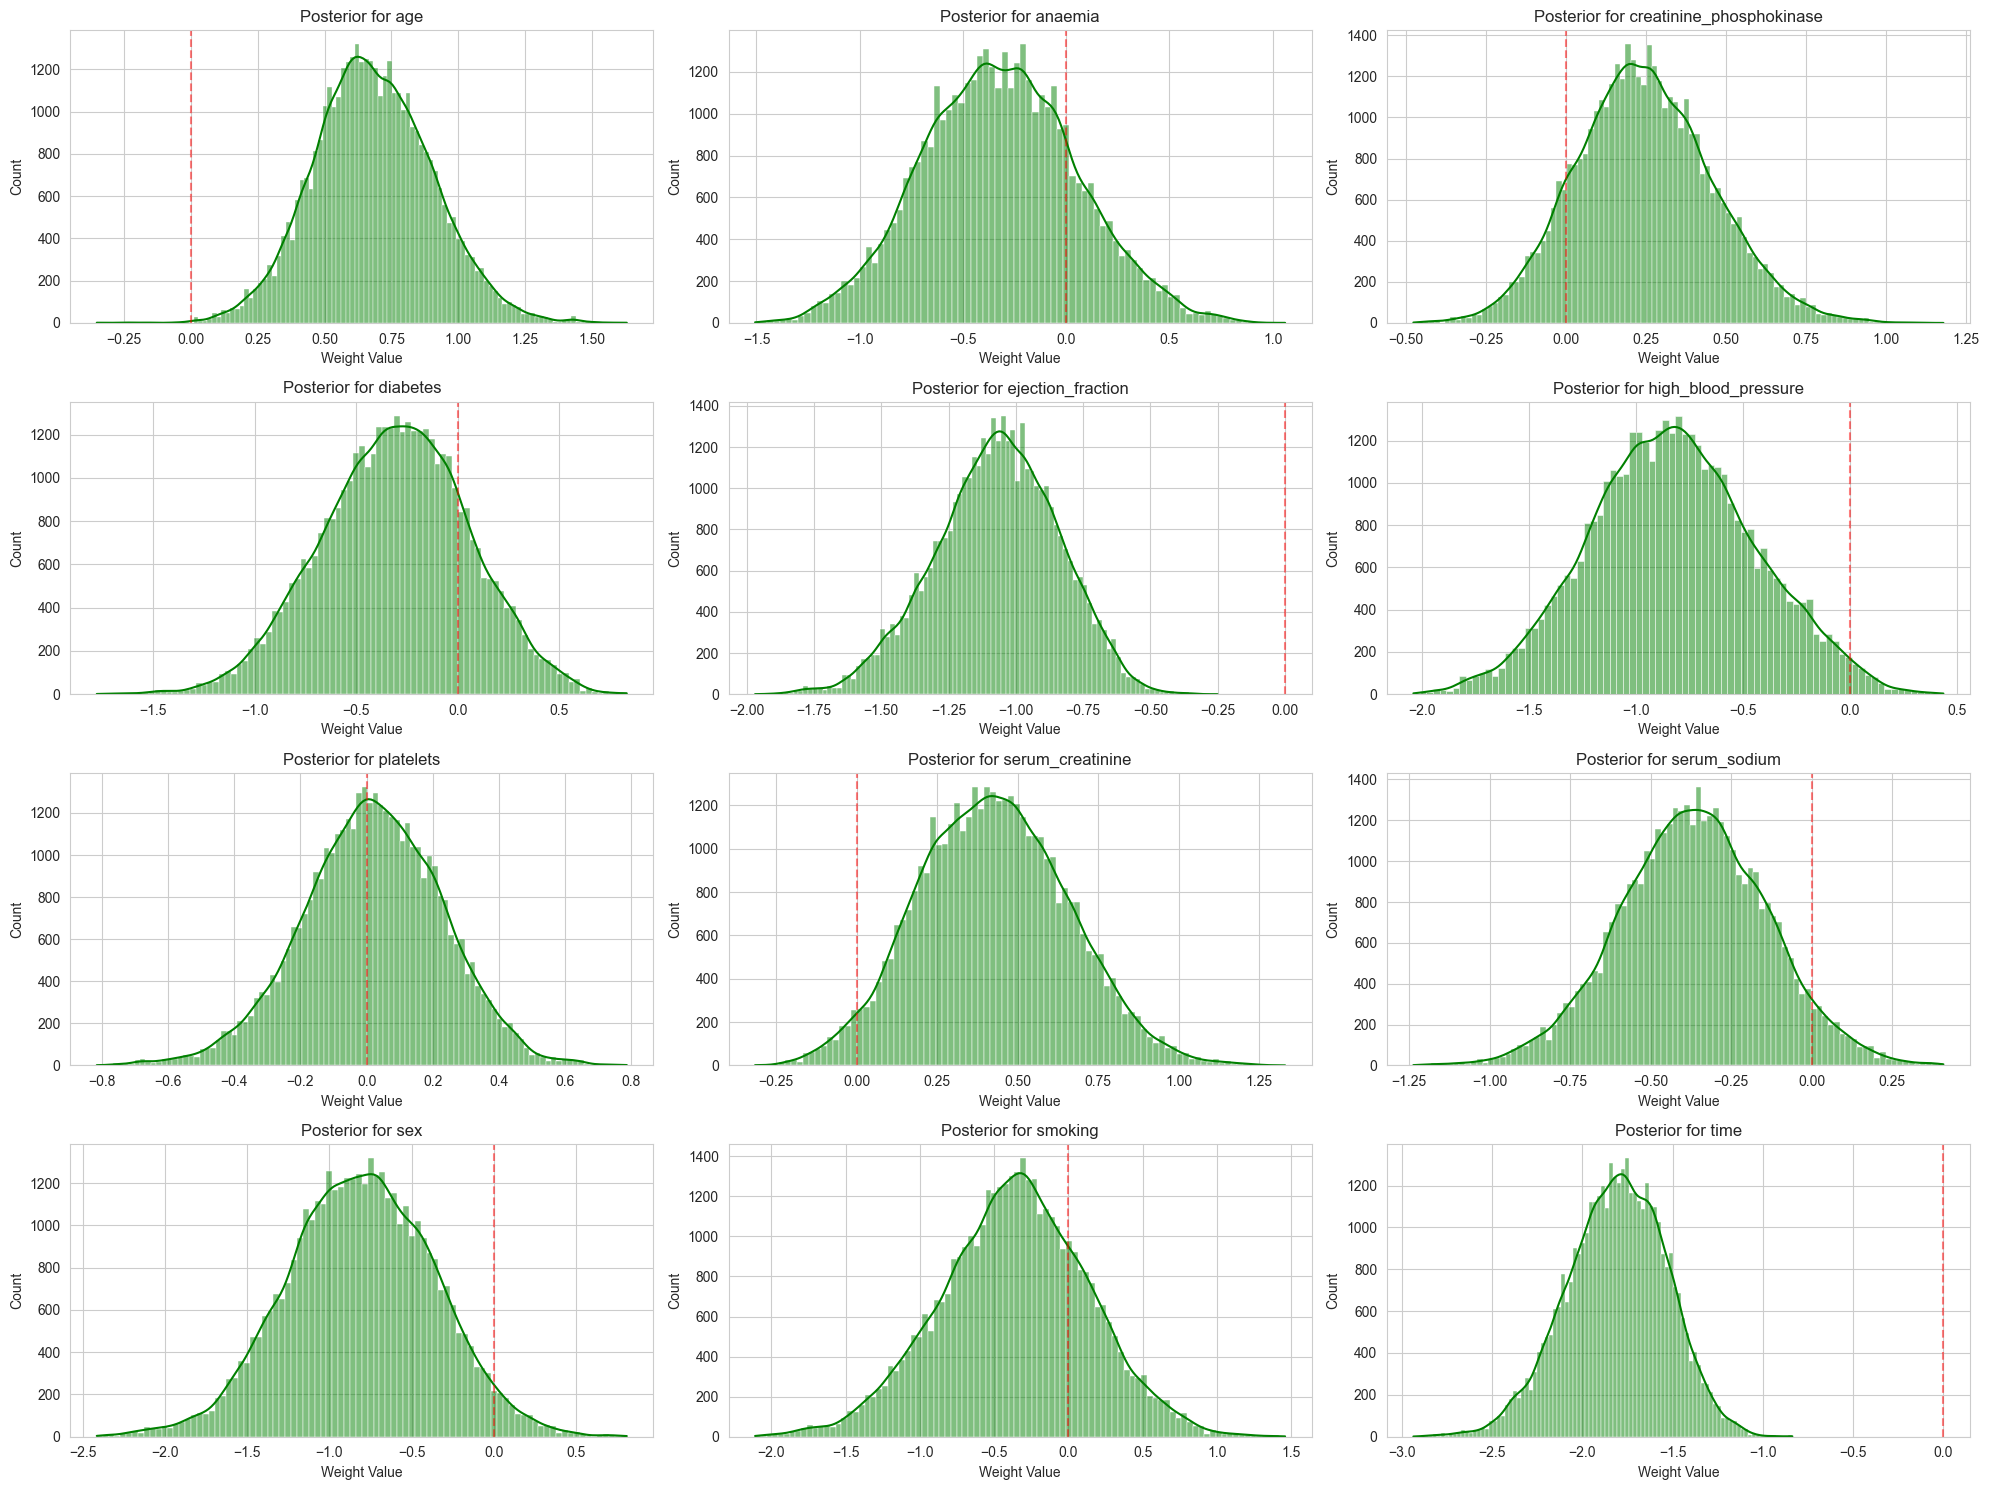

In [4]:
burn_in = int(trace.shape[0] * 0.2)  # Discard first 20% as burn-in
trace_burned = trace[burn_in:]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < trace.shape[1]:
        sns.histplot(trace_burned[:, i], kde=True, ax=ax, color='green')
        ax.set_title(f'Posterior for {labels[i]}')
        ax.set_xlabel('Weight Value')
        ax.axvline(0, color='red', linestyle='--', alpha=0.5) # Zero line for reference
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

## 4. Summary Statistics
Mean and Standard Deviation of the posterior distributions.

In [5]:
summary_df = pd.DataFrame({
    'Feature': labels,
    'Mean Weight': np.mean(trace_burned, axis=0),
    'Std Dev': np.std(trace_burned, axis=0),
    '2.5%': np.percentile(trace_burned, 2.5, axis=0),
    '97.5%': np.percentile(trace_burned, 97.5, axis=0)
})

summary_df.sort_values(by='Mean Weight', key=abs, ascending=False)

,Feature,Mean Weight,Std Dev,2.5%,97.5%
11,time,-1.811425,0.278203,-2.383433,-1.299480
4,ejection_fraction,-1.071158,0.229638,-1.543275,-0.647063
5,high_blood_pressure,-0.827811,0.389242,-1.580889,-0.052567
9,sex,-0.810389,0.450385,-1.697555,0.058669
0,age,0.681411,0.221821,0.258705,1.126081
7,serum_creatinine,0.424834,0.231302,-0.015663,0.883034
8,serum_sodium,-0.367263,0.229522,-0.827439,0.086393
10,smoking,-0.360574,0.500942,-1.369512,0.614391
1,anaemia,-0.321674,0.374681,-1.047565,0.431607
3,diabetes,-0.308203,0.362044,-1.022279,0.381234
